# Correlation function of DR72 SDSS VAGC Catalog

First import all the modules such as healpy and astropy needed for analyzing the structure

In [1]:
import healpix_util as hu
import astropy as ap
import numpy as np
from astropy.io import fits
from astropy.table import Table
import astropy.io.ascii as ascii
from astropy.io import fits
from astropy.constants import c
import matplotlib.pyplot as plt
import math as m
from math import pi
import scipy.special as sp
from scipy import integrate
import warnings
from sklearn.neighbors import BallTree
import pickle
import pymangle
from scipy.optimize import curve_fit
%matplotlib inline

In [3]:
dr7full=ascii.read("./input/DR7-Full.ascii")
dr7full

col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12
float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64
56.1604523761,-0.221359772462,0.4501842,-22.0970516205,0.9943343,0.310859,1.7112147,1.0,0.9901478,32763,33480,784
58.247844859,0.216329004672,0.3671646,-21.8688602448,0.9533011,0.7922078,0.9208817,1.0,0.9506173,303471,311902,3790
54.445380928,0.619974218725,0.4133244,-21.7306137085,1.0,0.4315305,1.4082278,1.0,0.9183673,43630,44552,779
54.4879828915,0.485825651457,0.3224697,-21.8775806427,1.0,0.9240486,0.8174705,1.0,0.9183673,43622,44544,779
54.4932987631,0.483249792951,0.3226457,-21.6763000488,1.0,0.9249313,0.8168564,1.0,0.9183673,43622,44544,779
55.5558858448,0.582441686132,0.2334688,-21.5131568909,0.9943343,1.0009493,0.7672175,1.0,0.9901478,43723,44650,784
55.5686146471,0.608277412471,0.3136448,-21.5073776245,0.9943343,0.8425107,0.8784812,1.0,0.9901478,43727,44654,784
55.5972002797,0.434026434704,0.3517163,-21.5829257965,0.9943343,0.8903325,0.8416406,1.0,0.9901478,43731,44658,784
55.7617273511,0.495315330472,0.403208,-21.3501148224,0.9943343,0.4957986,1.2868758,1.0,0.9901478,43740,44667,784


In [ ]:
z=dr7full['col3']
rad=dr7full['col1']
decd=dr7full['col2']

In [4]:
#Ez = lambda x: 1.0/m.sqrt(0.3*(1+x)**3+0.7)
Om=0.3
Ol=0.7
Ok=0.0
def Ez(zv):
    return 1.0/m.sqrt(Om*(1.0+zv)**3+Ok*(1.0+zv)**2+Ol)

np.vectorize(Ez)
#Calculate comoving distance of a data point using the Redshift - This definition is based on the cosmology model we take. Here the distance for E-dS universe is considered. Also note that c/H0 ratio is cancelled in the equations and hence not taken.

In [11]:
def DC_LCDM(z):
  return integrate.quad(Ez, 0, z)[0]
DC_LCDM=np.vectorize(DC_LCDM)

In [ ]:
DC_LCDM(2.0)

In [ ]:
DC=DC_LCDM(z)
DC

In [ ]:
dr7f = open("./output/DR72srarf.dat",'w')
dr7f.write("z\t ra\t dec\t s\t rar\t decr \n")

for i in range(0,len(dr7full)):
    dr7f.write("%f\t " %z[i])
    dr7f.write("%f\t %f\t " %(rad[i],decd[i]))
    dr7f.write("%f\t " %DC[i])
    dr7f.write("%f\t %f\n " %(rad[i]*pi/180.0,decd[i]*pi/180.0))
dr7f.close()

In [5]:
data=ascii.read("./output/DR72srarf.dat")

In [ ]:
data['z']

In [ ]:
data['s']

In [ ]:
data['rar']

In [ ]:
data['decr']

In [ ]:
NSIDE=512
dr72hpix=hu.HealPix("ring",NSIDE)

In [ ]:
pixdata = open("./output/pixdatadr72VAGCfull.dat",'w')
pixdata.write("z\t pix \n")

for i in range(0,len(data)):
    pixdata.write("%f\t" %data['z'][i])
    pixdata.write("%d\n" %dr72hpix.eq2pix(data['ra'][i],data['dec'][i]))
pixdata.close()

In [ ]:
pixdata = ascii.read("./output/pixdatadr72VAGCfull.dat")
hpixdata=np.array(np.zeros(hu.nside2npix(NSIDE)))
for j in range(len(pixdata)):
    hpixdata[pixdata[j]['pix']]+=1

In [ ]:
hpixdata

In [ ]:
hu.mollview(hpixdata,rot=180)

In [ ]:
mangle=pymangle.Mangle("./masks/window.dr72safe0.ply")

Ref: https://pypi.python.org/pypi/pymangle/

In [ ]:
%%time
rar,decr=mangle.genrand(2*len(data))

In [ ]:
rar

In [ ]:
decr

In [6]:
zr=np.array([data['z'],data['z']])

In [7]:
zr

array([[ 0.450184,  0.367165,  0.413324, ...,  0.368113,  0.22131 ,
         0.34707 ],
       [ 0.450184,  0.367165,  0.413324, ...,  0.368113,  0.22131 ,
         0.34707 ]])

In [8]:
zr=zr.flatten()

In [9]:
zr

array([ 0.450184,  0.367165,  0.413324, ...,  0.368113,  0.22131 ,  0.34707 ])

In [14]:
print len(zr)
print len(dec)

211662
211661


In [2]:
datR=ascii.read("./output/rand200kdr72.dat")

In [10]:
ra=datR['ra']
dec=datR['dec']

In [12]:
DCr=DC_LCDM(zr)

In [15]:
rdr7f = open("./output/rDR72srarf.dat",'w')
rdr7f.write("z\t ra\t dec\t s\t rar\t decr \n")

for i in range(0,len(zr)-1):
    rdr7f.write("%f\t " %zr[i])
    rdr7f.write("%f\t %f\t " %(ra[i],dec[i]))
    rdr7f.write("%f\t " %DCr[i])
    rdr7f.write("%f\t %f\n " %(ra[i]*pi/180.0,dec[i]*pi/180.0))
rdr7f.close()

In [16]:
dataR=ascii.read("./output/rDR72srarf.dat")

In [17]:
dataR['z']

0.450184
0.367165
0.413324
0.32247
0.322646
0.233469
0.313645
0.351716
0.403208
0.37691
0.168714


In [18]:
NSIDE=512
rdr72hpix=hu.HealPix("ring",NSIDE)

In [22]:
pixdata = open("./output/pixrand200kdr72.dat",'w')
pixdata.write("z\t pix \n")
for i in range(0,len(ra)):
    pixdata.write("%f\t" %zr[i])
    pixdata.write("%d\n" %rdr72hpix.eq2pix(ra[i],dec[i]))
pixdata.close()

In [23]:
pixdata = ascii.read("./output/pixrand200kdr72.dat")
hpixdata=np.array(np.zeros(hu.nside2npix(NSIDE)))
for j in range(len(pixdata)):
    hpixdata[pixdata[j]['pix']]+=1

In [24]:
hpixdata

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

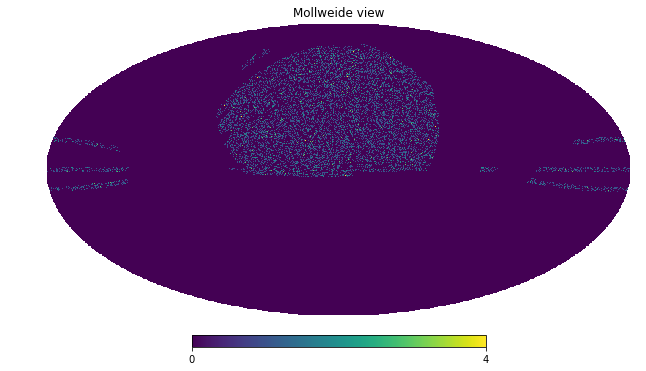

In [25]:
hu.mollview(hpixdata,rot=180)
plt.savefig("./plots/rand200kmnew.pdf")

In [ ]:
from scipy.stats import norm
from sklearn.neighbors import KernelDensity

In [ ]:
from lcdmmetric import *

In [ ]:
z=np.array(data['z'])

In [ ]:
zkde=z.reshape(1,-1)

In [ ]:
kde = KernelDensity(kernel='gaussian', bandwidth=0.75).fit(zkde)

In [ ]:
kde

In [ ]:
X_plot = np.arange(z.min(), z.max(), z.size())[:, np.newaxis]

In [ ]:
log_dens = kde.score_samples(zkde)

In [ ]:
log_dens

In [ ]:
d=ascii.read("./output/DR72LCsrarf.dat")

In [ ]:
d

In [ ]:
dataR=ascii.read("./output/rand200kdr72.dat")

In [ ]:
dataR['z']

In [ ]:
dataR['ra']

In [ ]:
dataR['dec']

In [ ]:
DCLCR=DC_LC(dataR['z'])

In [ ]:
rdr7f = open("./output/rDR7200kLCsrarf.dat",'w')
rdr7f.write("z\t ra\t dec\t s\t rar\t decr \n")

for i in range(0,len(dataR)):
    rdr7f.write("%f\t " %dataR['z'][i])
    rdr7f.write("%f\t %f\t " %(dataR['ra'][i],dataR['dec'][i]))
    rdr7f.write("%f\t " %DCLCR[i])
    rdr7f.write("%f\t %f\n " %(dataR['ra'][i]*pi/180.0,dataR['dec'][i]*pi/180.0))
rdr7f.close()

In [ ]:
r=ascii.read("./output/rDR7200kLCsrarf.dat")

In [ ]:
r

In [ ]:
dr7fdat=ascii.read("./output/DR7srarf.dat")

In [ ]:
dr7fdat['s'][1:300]

In [ ]:
#fdata=fits.open("/Users/rohin/Downloads/DR7-Full.fits")

In [ ]:
#fdata.writeto("./output/DR7fulltrim.fits")

In [ ]:
fdata=fits.open("./output/DR7fulltrim.fits")

In [ ]:
cols=fdata[1].columns

In [ ]:
cols.del_col('ZTYPE')

In [ ]:
cols.del_col('SECTOR')
cols.del_col('FGOTMAIN')
cols.del_col('QUALITY')
cols.del_col('ISBAD')
cols.del_col('M')
cols.del_col('MMAX')
cols.del_col('ILSS')
cols.del_col('ICOMB')
cols.del_col('VAGC_SELECT')
cols.del_col('LSS_INDEX')
cols.del_col('FIBERWEIGHT')
cols.del_col('PRIMTARGET')
cols.del_col('MG')
cols.del_col('SECTOR_COMPLETENESS')
cols.del_col('COMOV_DENSITY')
cols.del_col('RADIAL_WEIGHT')

In [ ]:
fdata[1].columns

In [ ]:
fdata.writeto("./output/DR7fullzradec.fits")

In [ ]:
fdat=fits.open("./output/DR7fullzradec.fits")

In [ ]:
fdat[1].columns

In [ ]:
fdat[1].data['Z']

In [ ]:
fdat[1].data['RA']

In [ ]:
comovlcdm=DC_LCDM(fdat[1].data['Z'])

In [ ]:
fdat[1].data['Z']

In [ ]:
comovlcdm

In [ ]:
comovlcdm.dtype

In [ ]:
#cols=fdat[1].columns

In [ ]:
nc=fits.Column(name='COMOV',format='D',array=comovlcdm)

In [ ]:
nc1=fits.Column(name='COMOV',format='D')

In [ ]:
fdata[1].data['Z']

In [ ]:
fdata[1].data['RA']

In [ ]:
nc

In [ ]:
nc.dtype

In [ ]:
#cols.add_col(nc)

In [ ]:
fdat[1].columns

In [ ]:
fdat[1].columns.info()

In [ ]:
fdat[1].columns.add_col(nc1)

In [ ]:
fdat[1].data['COMOV']=comovlcdm

In [ ]:
comovlcdm

In [ ]:
fdat[1].data['Z']

In [ ]:
fdat[1].data['COMOV']

In [ ]:
fdat[1].data['RA']

In [ ]:
fdat[1].data['RA']=fdat[1].data['RA']*pi/180.0

In [ ]:
comovlcdm=DC_LCDM(fdat[1].data['Z'])
comovlcdm

Random catalog created based on the survey limitations also taken from http://cosmo.nyu.edu/~eak306/SDSS-LRG.html

In [ ]:
dataR=fits.open("/Users/rohin/Downloads/random-DR7-Full.fits")

In [ ]:
dataR

In [ ]:
dataR=dataR[1].data

In [ ]:
len(dataR)

In [ ]:
NSIDE=512
dr72hpix=hu.HealPix("ring",NSIDE)

In [ ]:
pixdata = open("./output/pixdatadr72VAGCfullrand.dat",'w')
pixdata.write("z\t pix \n")

for i in range(0,len(data)-1):
    pixdata.write("%f\t" %data['z'][i])
    pixdata.write("%d\n" %dr72hpix.eq2pix(dataR['ra'][i],dataR['dec'][i]))
pixdata.close()

In [ ]:
pixdata = ascii.read("./output/pixdatadr72VAGCfullrand.dat")
hpixdata=np.array(np.zeros(hu.nside2npix(NSIDE)))
for j in range(len(pixdata)):
    hpixdata[pixdata[j]['pix']]+=1

In [ ]:
hpixdata

In [ ]:
hu.mollview(hpixdata,rot=180)

In [ ]:
hu.orthview(hpixdata)